In [1]:
import numpy as np
import gym
import seaborn as sns
import pandas as pd
import tensorflow as tf
sns.set()

***
# Q-learning

***
### Value Function
Recall the definition of the **value function** $V(s_t)$:

$$
V(s_t) = \mathbb{E} \left[ G_t \vert s_t \right]
$$

In an MDP, our expected discounted return $G_t$ depends on the trajectories $\tau$ that we generate. Whereas in a Markov process or Markov reward process this depends only on the underlying state dynamics, in an MDP, trajectories also depend on the actions that we choose. Since these actions are determined by our **policy** $\pi$, we write the following:

$$
V^\pi (s_t) = \mathbb{E}_\pi \left[ G_t \vert s_t \right]
$$

that is, given that we are currently in state $s_t$, what value should we expect our discounted return $G_t$ to be, given that we generate trajectories according to our policy $\pi$?

***
### Action-Value function
We can define an analogous definition for the **action-value function**, which extends the notion of the value function to account for choosing a *specific action* $a_t$ in a state $s_t$, rather than just choosing the one suggested by the policy:

$$
Q^\pi (s_t, a_t) = \mathbb{E}_\pi \left[ G_t \vert s_t, a_t \right]
$$

that is, given that we are currently in state $s_t$, taking action $a_t$, what value should we expect our discounted return $G_t$ to be? We can see the relationship between $V^\pi (s_t)$ and $Q^\pi (s_t, a_t)$:

$$
V^\pi (s_t) = \mathbb{E}_{a_t \sim \pi} \left[ Q^\pi (s_t, a_t) \vert s_t \right]
$$



We also have a Bellman equation for the state-value function:
$$
Q^\pi (s_t, a_t) = \mathbb{E}_\pi \left[ r_t + \gamma Q^\pi (s_{t+1}, a_{t+1}) \vert s_t, a_t \right]
$$

***
### $Q$-learning
$Q$-learning is an algorithm analogous to the TD(0) algorithm we've described before. In TD(0), we have a table $V$ containing predictions for $V^\pi (s_t)$ for each state $s_t$, updating our predictions as follows:

$$
V (s_t) \gets V (s_t) + \alpha \left( r_t + \gamma V (s_{t+1}) - V (s_t) \right)
$$

In $Q$-learning, we have a similar learning rule, except that our table now contains values for any state-action pair $(s_t, a_t)$.

$$
Q(s_t, a_t) \gets Q(s_t, a_t) + \alpha \left( r_t + \gamma Q(s_{t+1}, a_{t+1}) - Q(s_t, a_t) \right)
$$

The advantage of $Q$-learning is that we have an estimate, for each action, of the expected discounted return we will get from taking that action. Recall the reward hypothesis:

> Every action of a rational agent can be thought of as seeking to maximize some cumulative scalar reward signal.

Consider being in some state $s_t$, and for each action $a_t$ we compute $Q(s_t, a_t)$. These values are our guesses for the discounted return we will get as a result of choosing each action. If we choose the action that maximizes $Q(s_t, a_t)$, then our agent is maximizing the discounted return. This defines a **greedy policy**

$$
\pi(a_t \vert s_t) = \begin{cases} 1, & a_t = \arg \max_{a_t} Q(s_t, a_t) \\ 0, & \text{otherwise} \end{cases}
$$

Knowing this, we can estimate the $Q$ value for the next state-action pair $(s_{t+1}, a_{t+1})$ by assuming the agent chooses the action that maximizes that $Q$ value. This gives us the following update rule:

$$
Q(s_t, a_t) \gets Q(s_t, a_t) + \alpha \left( r_t + \gamma \max_{a_{t+1}} \left( Q(s_{t+1}, a_{t+1}) \right) - Q(s_t, a_t) \right)
$$

***
### Modified Bellman Equation and Terminal States
Recall that some environments are **episodic**. This means that there must be some states $s_T$ where, regardless of what action is chosen, the next state is always $s_T$ and the reward is always $0$. In the `gym` interface, we use the `step` function to inform the agent about $s_{t+1}$, $r_t$, $d_t$, and `info`, where $d_t$ is a boolean flag that is `True` when the current state is terminal and `False` otherwise.

By the definition of $Q(s_t, a_t)$, we can see that $r_t + \gamma Q(s_{t+1}, a_{t+1})$ is an unbiased estimate for $Q(s_t, a_t)$. This is what gives us the Bellman equation update rule. If we know that a state is terminal, then we have an even better estimate: if $s_t$ is terminal, then $G_t = r_t$, and our update rule is just

$$
Q(s_t, a_t) \gets Q(s_t, a_t) + \alpha \left( r_t - Q(s_t, a_t) \right)
$$

If we interpret the truthiness of $d_t$ as an integer (i.e., $d_t = 1$ if `True` and $0$ if `False`), then we can define a modified update rule that takes terminal states into account:

$$
Q(s_t, a_t) \gets Q(s_t, a_t) + \alpha \left( r_t + (1-d_t)\gamma \max_{a_{t+1}} \left( Q(s_{t+1}, a_{t+1}) \right) - Q(s_t, a_t) \right)
$$

***
### Exploration-Exploitation

Our agent can quickly become stuck in a suboptimal policy by always choosing the same action in the same state. This prevents the agent from exploring, and consequently from improving its predictions about $Q$. This problem is known as the **exploration-exploitation tradeoff**: should we try to learn more about the $Q$ function by exploring (and thus finding a better policy) or should we exploit what we know about the environment to try to maximize the returns that we know about?

### $\epsilon$-greedy approaches
sims

In [2]:
class Agent:
    def __init__(self, num_states, num_actions, 
                 epsilon_i=1.0, 
                 epsilon_f=0.0, 
                 n_epsilon=0.1, 
                 alpha=0.5, 
                 gamma = 0.95):
        
        self.epsilon_i = epsilon_i
        self.epsilon_f = epsilon_f
        self.epsilon = epsilon_i
        self.n_epsilon = n_epsilon
        self.num_states = num_states
        self.num_actions = num_actions
        self.alpha = alpha
        self.gamma = gamma
        self.Q = np.zeros((num_states, num_actions))

    def decay_epsilon(self, n):
        self.epsilon = max(
            self.epsilon_f, 
            self.epsilon_i - (n/self.n_epsilon)*(self.epsilon_i - self.epsilon_f))
    
    def act(self, s_t):
        if np.random.rand() < self.epsilon:
            return np.random.randint(self.num_actions)
        return np.argmax(self.Q[s_t])
    
    def update(self, s_t, a_t, r_t, s_t_next, d_t):
        Q_next = np.max(self.Q[s_t_next])
        self.Q[s_t, a_t] = self.Q[s_t, a_t] + \
        self.alpha*(r_t + (1-d_t)*self.gamma*Q_next - \
        self.Q[s_t, a_t])

In [3]:
def train(env, agent,
         T=100000):
    
    rewards = []
    episode_rewards = 0
    
    s_t = env.reset()
    
    for t in range(T):
        a_t = agent.act(s_t)
        s_t_next, r_t, d_t, info = env.step(a_t)
        agent.update(s_t, a_t, r_t, s_t_next, d_t)
        agent.decay_epsilon(t/T)
        s_t = s_t_next
        episode_rewards += r_t
        
        if d_t:
            rewards.append(episode_rewards)
            episode_rewards = 0
            s_t = env.reset()
            
    return rewards

In [4]:
def plot(data, window=100):
    sns.lineplot(
        data=data.rolling(window=window).mean()[window-1::window]
    )

In [5]:
env = gym.make("FrozenLake-v0")
num_states = env.observation_space.n
num_actions = env.action_space.n
agent = Agent(num_states, num_actions, alpha=0.8, gamma=0.95, epsilon_i=1.0, epsilon_f=0.0)

rewards = train(env, agent, T=100000)

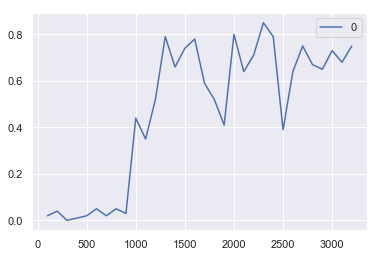

In [6]:
df = pd.DataFrame(rewards)
plot(df)